🔑 Recency, Frequency, Monetary Value (RFM)

In [23]:
#import library
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import numpy as np

In [2]:
#load data
df= pd.read_csv('rfm.csv')

In [138]:
#dataframe
df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,01/12/2009 07:45,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,01/12/2009 07:45,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,01/12/2009 07:45,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,01/12/2009 07:45,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,01/12/2009 07:45,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,09/12/2010 20:01,2.95,17530.0,United Kingdom
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,09/12/2010 20:01,3.75,17530.0,United Kingdom
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,09/12/2010 20:01,3.75,17530.0,United Kingdom
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,09/12/2010 20:01,3.75,17530.0,United Kingdom


In [3]:
#data type of all columns 
df.dtypes

Invoice         object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
Price          float64
Customer ID    float64
Country         object
dtype: object

In [7]:
#we convert 'invoicedate' column to date type 
df['InvoiceDate'] = df['InvoiceDate'].astype('datetime64[ns]')
df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-01-12 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-01-12 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-01-12 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-01-12 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-01-12 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-09-12 20:01:00,2.95,17530.0,United Kingdom
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-09-12 20:01:00,3.75,17530.0,United Kingdom
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-09-12 20:01:00,3.75,17530.0,United Kingdom
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-09-12 20:01:00,3.75,17530.0,United Kingdom


💡 Recency

In [8]:
#recency --> How recently a client purchased a product
#we find 'recency'
df['Recency'] = datetime.now() - df['InvoiceDate']
recency = df.groupby(df['Customer ID'])[['Recency']].min()
recency = pd.DataFrame(recency)
recency['Recency'] = recency['Recency'].dt.days
recency['Recency'] = round(recency['Recency'] / 365,2)
recency


,Recency
Customer ID,
12346.0,12.97
12347.0,12.64
12348.0,12.73
12349.0,12.64
12351.0,12.56
...,...
18283.0,12.58
18284.0,13.03
18285.0,13.34


💡 Frequency

In [14]:
#frequency --> How often they buy
#we find frequency
freq = df.groupby(df['Customer ID'])[['Quantity']].count()
freq = pd.DataFrame(freq)
freq.rename(columns={'Quantity':'Frequency'} , inplace= True)
freq

,Frequency
Customer ID,
12346.0,46
12347.0,71
12348.0,20
12349.0,107
12351.0,21
...,...
18283.0,230
18284.0,29
18285.0,12


💡 Monetary Value

In [15]:
#monetary value --> How much money they spend
#we find monetary
df['Monetary'] = df['Quantity']*df['Price']
monet = df.groupby(df['Customer ID'])[['Monetary']].sum()
monet = pd.DataFrame(monet)
monet

,Monetary
Customer ID,
12346.0,-64.68
12347.0,1323.32
12348.0,222.16
12349.0,2646.99
12351.0,300.93
...,...
18283.0,641.77
18284.0,436.68
18285.0,427.00


In [67]:
rfm = pd.concat([recency,freq,monet],axis=1)
rfm

,Recency,Frequency,Monetary
Customer ID,,,
12346.0,12.97,46,-64.68
12347.0,12.64,71,1323.32
12348.0,12.73,20,222.16
12349.0,12.64,107,2646.99
12351.0,12.56,21,300.93
...,...,...,...
18283.0,12.58,230,641.77
18284.0,13.03,29,436.68
18285.0,13.34,12,427.00


In [68]:
recency.dtypes

Recency    float64
dtype: object

📇 RFM score

In [69]:
#In this case, let's apply the formula
#formula : "0.2 *Recency score + 0.25*Frequency score + 0.5 *Monetary score"
rfm['RFM Score'] = 0.2*rfm['Recency'] + 0.25*rfm['Frequency']+ 0.5*rfm['Monetary']
rfm

,Recency,Frequency,Monetary,RFM Score
Customer ID,,,,
12346.0,12.97,46,-64.68,-18.246
12347.0,12.64,71,1323.32,681.938
12348.0,12.73,20,222.16,118.626
12349.0,12.64,107,2646.99,1352.773
12351.0,12.56,21,300.93,158.227
...,...,...,...,...
18283.0,12.58,230,641.77,380.901
18284.0,13.03,29,436.68,228.196
18285.0,13.34,12,427.00,219.168


In [70]:
#Let's sort by 'RFM Score'
sorted_rfm = rfm.sort_values('RFM Score', ascending=False)
sorted_rfm.head(5)

,Recency,Frequency,Monetary,RFM Score
Customer ID,,,,
18102.0,12.54,635,341776.73,171049.623
14646.0,12.55,1805,243853.05,122380.285
14156.0,12.53,2710,183180.55,92270.281
14911.0,12.52,5710,137675.91,70267.959
13694.0,12.53,973,128172.42,64331.966


📊 Data Visualization 

Text(0.5, 1.0, 'RFM Score')

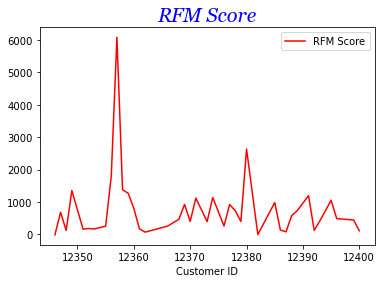

In [ ]:
#Let's create a graph
rfm.head(40).plot(y = 'RFM Score' , color  = 'r')
plt.title('RFM Score', fontsize = 20, color = 'b' , fontstyle = 'italic' , fontname = 'Georgia')

Text(0.5, 1.0, 'Correlation Chart')

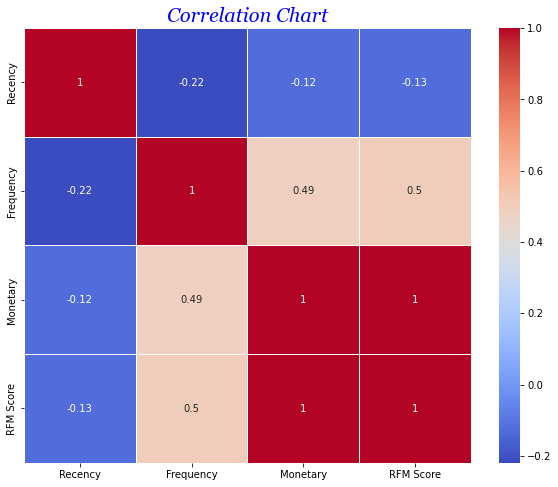

In [ ]:
#Let's create a "heatmap" for correlation
plt.figure(figsize=(10, 8))
sns.heatmap(rfm.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Chart', fontsize = 20, color = 'b' , fontstyle = 'italic' , fontname = 'Georgia')

📋 Conclusion

In [ ]:
#Monetary's correlation is great because the coefficient of Monetory is greater than others and the relationship is strong
#Second is Frequency becouse its coefficient is great relatively and the relationship is normal
#Third is Recency becouse its coefficient is lower than others and the relationship is weak 
#As conclusion, Whose "recency" value is low, his RMS Score is high
#It means that for the RFM score to be good, the value of "Monertary" and "Frequency" should be high and the value of "Recency" should be low

🔖Clustering

In [71]:
#let's cluster
scaler = StandardScaler()
scaled = scaler.fit_transform(rfm)

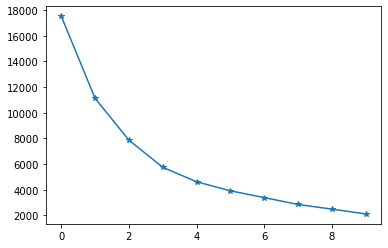

In [72]:
#let's create graph
inertia = []
for i in np.arange(1, 11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(scaled)
    inertia.append(kmeans.inertia_)
plt.plot(inertia , marker = '*')

In [78]:
#Let's create 3 groupings
kmeans = KMeans(n_clusters=3)
kmeans.fit(scaled)
rfm['Clusters'] = kmeans.labels_ + 1
rfm

,Recency,Frequency,Monetary,RFM Score,Clusters
Customer ID,,,,,
12346.0,12.97,46,-64.68,-18.246,1
12347.0,12.64,71,1323.32,681.938,2
12348.0,12.73,20,222.16,118.626,2
12349.0,12.64,107,2646.99,1352.773,2
12351.0,12.56,21,300.93,158.227,2
...,...,...,...,...,...
18283.0,12.58,230,641.77,380.901,2
18284.0,13.03,29,436.68,228.196,1
18285.0,13.34,12,427.00,219.168,1


In [79]:
#let's find the mean of group characteristics
rfm.groupby(rfm['Clusters'])['Recency','Frequency','Monetary','RFM Score'].mean()

C:\Users\HP\AppData\Local\Temp\ipykernel_5432\3732947280.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  rfm.groupby(rfm['Clusters'])['Recency','Frequency','Monetary','RFM Score'].mean()


,Recency,Frequency,Monetary,RFM Score
Clusters,,,,
1,13.238433,27.71558,396.452494,207.802828
2,12.650021,114.57025,2100.142444,1081.243789
3,12.534000,2366.60000,206931.732000,104060.022800


In [82]:
#let's create a new column where we write the customer category based on customer characteristics
def func(dataframe):
    if dataframe['Clusters'] ==1:
        return 'Bad customer'
    elif dataframe['Clusters'] == 2:
        return 'Normal Customer'
    elif dataframe['Clusters'] ==3:
        return 'Good Customer'
    else:
        'No Customer'

In [83]:
#Let's apply func to our dataframe
rfm['Customer Status'] = rfm.apply(func,axis =1)

In [84]:
#Let's look at the customers who are "good customers" of the category
rfm[rfm['Clusters']==3]

,Recency,Frequency,Monetary,RFM Score,Clusters,Customer Status
Customer ID,,,,,,
13694.0,12.53,973,128172.42,64331.966,3,Good Customer
14156.0,12.53,2710,183180.55,92270.281,3,Good Customer
14646.0,12.55,1805,243853.05,122380.285,3,Good Customer
14911.0,12.52,5710,137675.91,70267.959,3,Good Customer
18102.0,12.54,635,341776.73,171049.623,3,Good Customer


In [85]:
#let's sorted as 'rfm score' then we look at first 5 rows
sorted_rfm = rfm.sort_values('RFM Score', ascending=False)
sorted_rfm.head()

,Recency,Frequency,Monetary,RFM Score,Clusters,Customer Status
Customer ID,,,,,,
18102.0,12.54,635,341776.73,171049.623,3,Good Customer
14646.0,12.55,1805,243853.05,122380.285,3,Good Customer
14156.0,12.53,2710,183180.55,92270.281,3,Good Customer
14911.0,12.52,5710,137675.91,70267.959,3,Good Customer
13694.0,12.53,973,128172.42,64331.966,3,Good Customer


In [93]:
#Let's look at the numbers of status
rfm_status = rfm['Customer Status'].value_counts()
rfm_status

Normal Customer    3274
Bad customer       1104
Good Customer         5
Name: Customer Status, dtype: int64

<AxesSubplot:>

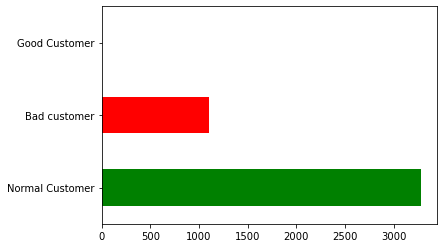

In [95]:
#let's create bar graph for customer status 
rfm_status.plot(kind = 'barh',color = ['green','red','blue'])

📍 The end